In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [2]:
# check tables size, variable types, descriptive statistics
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [3]:
user_data.shape

(2954, 3)

In [4]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [5]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [6]:
logs.shape

(4500, 4)

In [7]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [8]:
# how many unique values does "platform" take
len(logs.platform.unique())

3

In [9]:
# which client has made the most successful transactions?
success_users = logs \
    .query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'time': 'count'})

In [10]:
max_count = success_users.time.max()

In [11]:
result = success_users.query('time == @max_count').sort_values('client')['client']
print(*list(result), sep=', ')


12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584


In [12]:
# which platform has the highest number of successful transactions?
logs.query('success == True') \
        .groupby('platform') \
        .agg({'success': 'count'})

,success
platform,
computer,1090
phone,2019
tablet,180


In [13]:
# which platform is most popular among premium customers?
premium_users = user_data.query('premium == True')
premium_users.merge(logs, how='inner', on='client').value_counts('platform')

platform
phone       246
computer    150
tablet       24
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

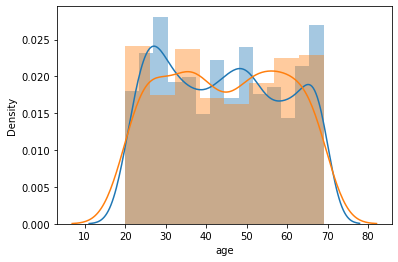

In [14]:
# visualize the age distribution of customers by customer type
full_users_data = user_data.merge(logs, how='inner', on='client')
sns.distplot(full_users_data.query('premium == False').age)
sns.distplot(full_users_data.query('premium == True').age)

In [15]:
success_operations = logs \
    .query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success': 'count'}) \
    .rename(columns={'client': 'id_client', 'success': 'success_operations'})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='success_operations', ylabel='Density'>

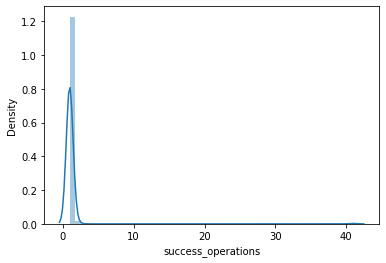

In [16]:
# plot the distribution of the number of successful operations
sns.distplot(success_operations.success_operations)

In [17]:
# visualize the number of successful operations done on the computer platform, depending on the age
all_users_info = user_data.merge(logs, how='inner', on='client')

<AxesSubplot:xlabel='age', ylabel='count'>

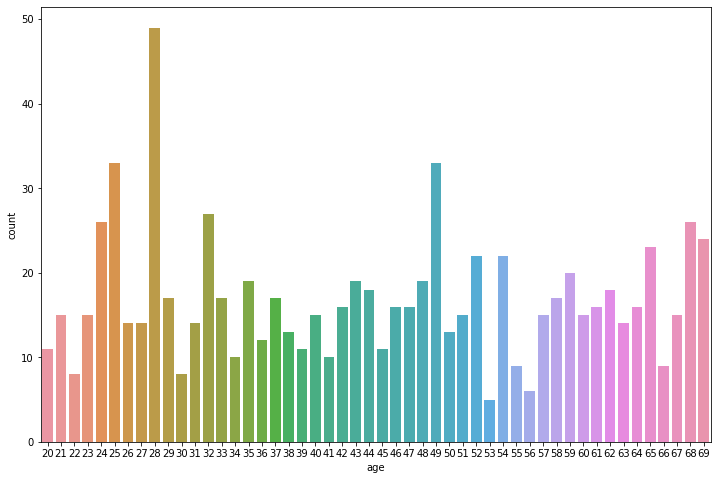

In [18]:
plt.figure(figsize=(12, 8))
computer_users = all_users_info.query('platform == "computer" and success == True')
sns.countplot(x='age', data=computer_users)


In [21]:
all_users_info.dtypes

client       int64
premium       bool
age          int64
success       bool
platform    object
time         int64
dtype: object